<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/08-Arboles-Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Árboles de Decisión
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Pablo Zambrano &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [13]:
# Paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [2]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

datos = mnist.data
etiquetas = mnist.target.astype(int)

print("Dimensión de los datos:", datos.shape)
print("Dimensión de las etiquetas:", etiquetas.shape)

Dimensión de los datos: (70000, 784)
Dimensión de las etiquetas: (70000,)


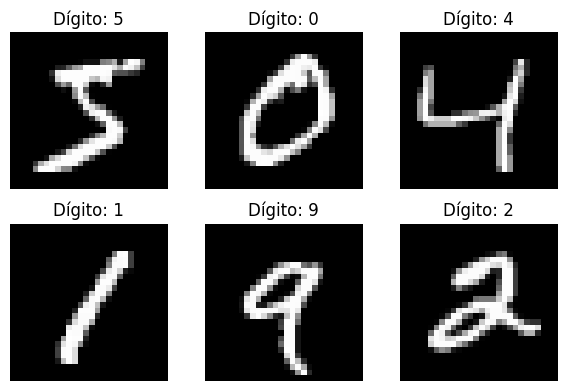

In [3]:
plt.figure(figsize=(6, 4))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(datos[i].reshape(28, 28), cmap='gray')
    plt.title(f"Dígito: {etiquetas[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
print("Número de imágenes:", datos.shape[0])
print("Número de variables por imagen:", datos.shape[1])
print("Valores mínimos y máximos de los píxeles:", datos.min(), datos.max())

Número de imágenes: 70000
Número de variables por imagen: 784
Valores mínimos y máximos de los píxeles: 0 255


In [5]:
datos_escalados = datos / 255.0

print("Nuevo rango de valores:", datos_escalados.min(), datos_escalados.max())

Nuevo rango de valores: 0.0 1.0


Originalmente estaba trabajando con mi base de datos de los carros pero para el anailis del perceptron he decidido con mnist porque esta presenta un problema de aprendisaje supervisado donde las observaciones son de 0 al 9 y permite evaluar de mejor forma este problema en vez de mi base data sales.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [11]:
# Separación en entrenamiento y prueba
datos_entrenamiento, datos_prueba, etiquetas_entrenamiento, etiquetas_prueba = train_test_split(datos_escalados, etiquetas, test_size=0.2, random_state=17)
modelo = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.1,
    max_iter=50,
    random_state=17)

modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', learning_rate_init=0.1, max_iter=50,
              random_state=17, solver='sgd')

In [12]:
predicciones = modelo.predict(datos_prueba)

exactitud = accuracy_score(etiquetas_prueba, predicciones)
print("Exactitud del modelo:", exactitud)
print("\nReporte de clasificación:")
print(classification_report(etiquetas_prueba, predicciones))


Exactitud del modelo: 0.9787142857142858

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1395
           1       0.99      0.99      0.99      1572
           2       0.97      0.98      0.98      1376
           3       0.98      0.97      0.98      1408
           4       0.98      0.98      0.98      1386
           5       0.98      0.97      0.97      1256
           6       0.98      0.99      0.98      1405
           7       0.98      0.98      0.98      1474
           8       0.98      0.97      0.97      1335
           9       0.97      0.97      0.97      1393

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



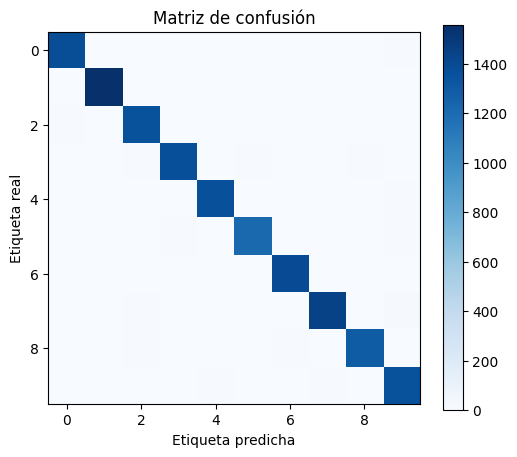

In [14]:
matriz_confusion = confusion_matrix(etiquetas_prueba, predicciones)

plt.figure(figsize=(6, 5))
plt.imshow(matriz_confusion, interpolation='nearest', cmap='Blues')
plt.title("Matriz de confusión")
plt.colorbar()
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()

En este ultimo paso se entreno un perceptron multicapa sobre los datos mnist usando el descenso de gradiente estocastico logrando un modelo capaz de clasificar correctamente del 0 al 9 es asi que las métricas obtenidas confirmaron una alta exactitud y un buen equilibrio entre precisión y recall